Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
# Read the data and preprocess
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
newData = newData.drop_duplicates()
newData = newData.asfreq('H')
newData = newData.fillna(method='ffill')


In [3]:
# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = newData.loc[:split_date]
test = newData.loc[split_date:]

In [7]:
# Create a new DataFrame for Prophet
prophet_data = train.reset_index()
prophet_data = prophet_data.rename(columns={'timestamp': 'ds', 'Office_Garman': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

17:02:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:00 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=len(test), freq='H')

# Generate predictions
predictions = model.predict(future)


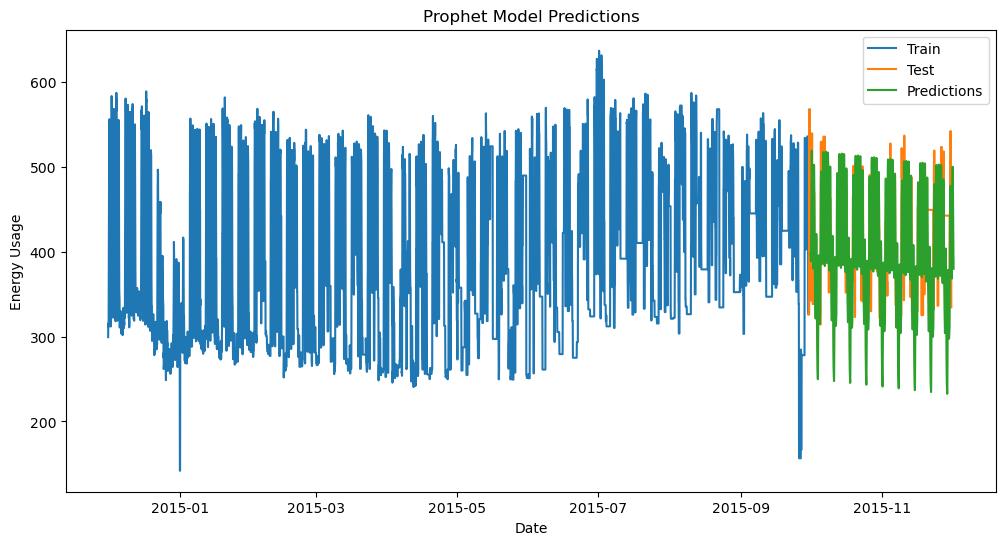

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(predictions['ds'].iloc[len(train):], predictions['yhat'].iloc[len(train):], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

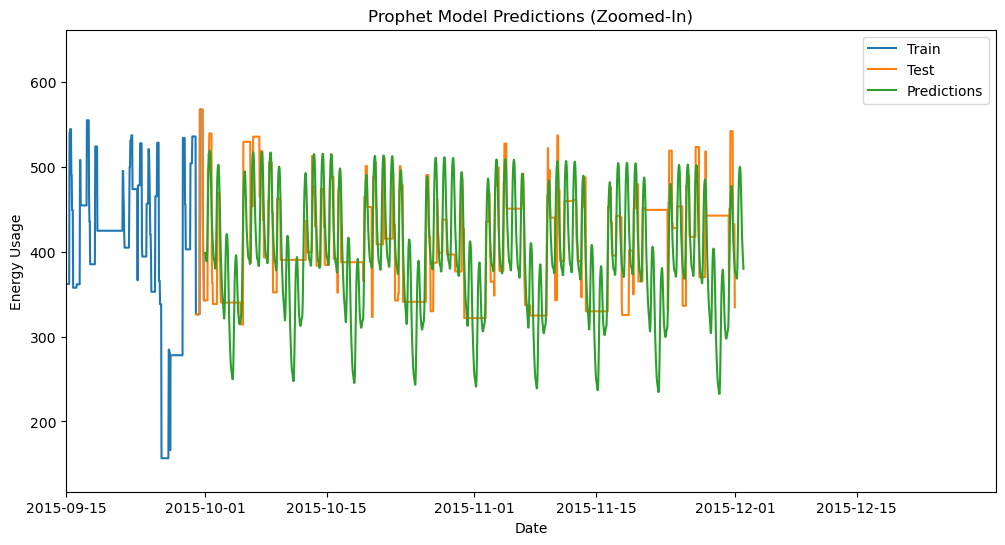

In [17]:
# Define the date range for zooming in
zoom_start_date = pd.to_datetime('2015-09-15')
zoom_end_date = pd.to_datetime('2015-12-31')

# Plotting the zoomed-in section
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(predictions['ds'].iloc[len(train):], predictions['yhat'].iloc[len(train):], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Prophet Model Predictions (Zoomed-In)')
plt.xlim(zoom_start_date, zoom_end_date)  # Set the x-axis limits
plt.legend()
plt.show()


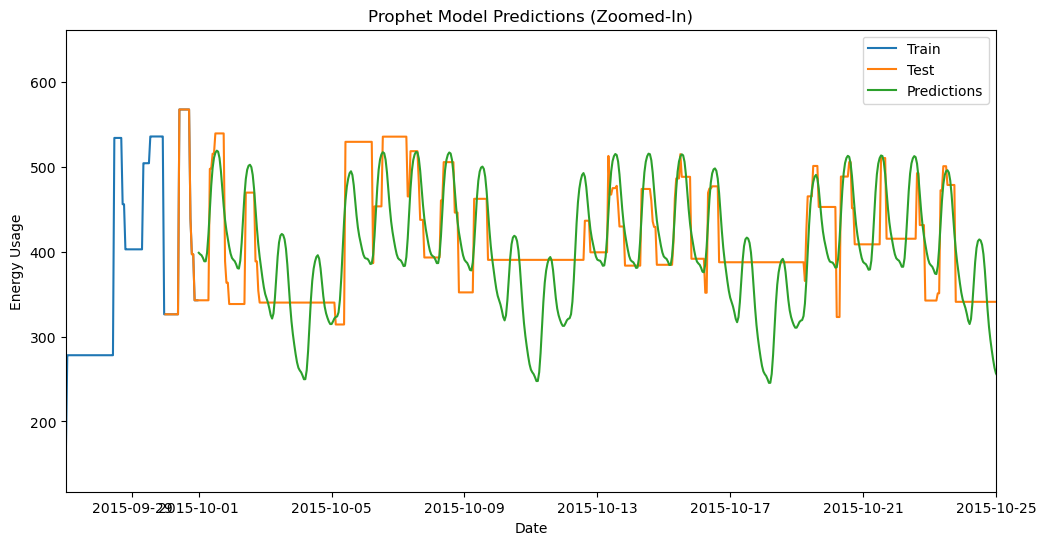

In [22]:
# Define the date range for zooming in
zoom_start_date = pd.to_datetime('2015-09-27')
zoom_end_date = pd.to_datetime('2015-10-25')

# Plotting the zoomed-in section
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(predictions['ds'].iloc[len(train):], predictions['yhat'].iloc[len(train):], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Prophet Model Predictions (Zoomed-In)')
plt.xlim(zoom_start_date, zoom_end_date)  # Set the x-axis limits
plt.legend()
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Extract the actual values and predicted values from the test set
actual_values = test.values
predicted_values = predictions['yhat'].iloc[len(train):].values

# Calculate the evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')


MAE: 53.84
MAPE: 0.14%
RMSE: 69.49
